In [24]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [28]:
# Define start and end dates
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=5000)).strftime("%Y-%m-%d")

# Download data from Yahoo Finance
data = yf.download('NFLX', 
                   start=start_date, 
                   end=end_date, 
                   progress=False)

# Check if data is retrieved successfully
if data.empty:
    print("Failed to download data. Check the ticker symbol or data availability.")
else:
    # Reset index and select required columns
    data.reset_index(inplace=True)
    data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
    print(data.tail())

           Date        Open        High         Low       Close   Adj Close  \
3441 2024-03-21  630.650024  634.359985  622.330017  622.710022  622.710022   
3442 2024-03-22  624.159973  629.049988  621.000000  628.010010  628.010010   
3443 2024-03-25  627.900024  630.460022  623.159973  627.460022  627.460022   
3444 2024-03-26  625.200012  634.390015  619.179993  629.239990  629.239990   
3445 2024-03-27  629.010010  631.349976  610.729980  613.530029  613.530029   

       Volume  
3441  2507700  
3442  2134100  
3443  1803300  
3444  2804500  
3445  2625700  


In [29]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Netflix Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [30]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.999794
Low          0.999782
Open         0.999535
Volume      -0.504563
Name: Close, dtype: float64


C:\Users\Vinayak\AppData\Local\Temp\ipykernel_12964\2923706208.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [31]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4, 128)            66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 25)                1625      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2756/2756 [==============================] - 61s 18ms/step - loss: 8219.2275
Epoch 2/30
2756/2756 [==============================] - 35s 13ms/step - loss: 547.0419
Epoch 3/30
2756/2756 [==============================] - 44s 16ms/step - loss: 544.2458
Epoch 4/30
2756/2756 [==============================] - 39s 14ms/step - loss: 557.4788
Epoch 5/30
2756/2756 [==============================] - 33s 12ms/step - loss: 288.2026
Epoch 6/30
2756/2756 [==============================] - 34s 12ms/step - loss: 323.6551
Epoch 7/30
2756/2756 [==============================] - 33s 12ms/step - loss: 237.1722
Epoch 8/30
2756/2756 [==============================] - 36s 13ms/step - loss: 334.2671
Epoch 9/30
2756/2756 [==============================] - 32s 12ms/step - loss: 209.7568
Epoch 10/30
2756/2756 [==============================] - 32s 12ms/step - loss: 266.1640
Epoch 11/30
2756/2756 [==============================] - 31s 11ms/step - loss: 295.6898
Epoch 12/30
2756/2756 [=================

In [34]:
import numpy as np
features = np.array([[401.970001, 427.700012, 398.200012, 20047500]])
model.predict(features)

1/1 [==============================] - 2s 2s/step


array([[387.58072]], dtype=float32)

22/22 [==============================] - 0s 9ms/step


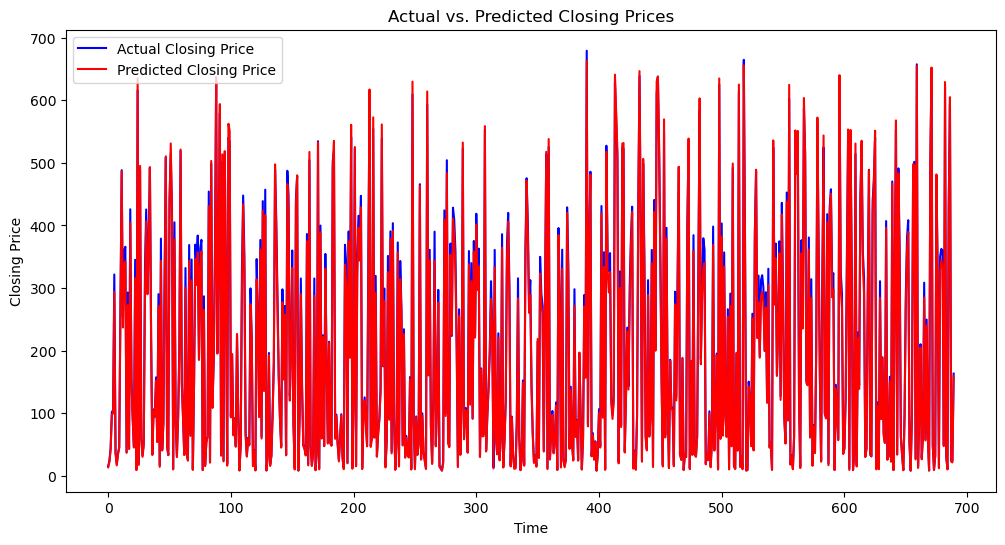

In [35]:
import matplotlib.pyplot as plt

predictions = model.predict(xtest)
plt.figure(figsize=(12, 6))
plt.plot(ytest, color='blue', label='Actual Closing Price')
plt.plot(predictions, color='red', label='Predicted Closing Price')
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
